In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load the dataset
df = pd.read_csv(r"/content/Indian_Kids_Screen_Time_cleaned (1).csv")

# Display first few rows to understand the data
df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Type,Health_Impact_Type,Device_Share,Edu_Recreational_Percent
0,14,Male,3.99,Smartphone,True,0.42,"poor sleep, eye strain",Urban,Teenagers,Portable,Physical,0.470346,42.0
1,11,Female,4.61,Laptop,True,0.30,poor sleep,Urban,Pre-teens,Portable,Physical,0.147549,30.0
2,18,Female,3.73,TV,True,0.32,poor sleep,Urban,Late teens,Wallmounted,Physical,0.256075,32.0
3,15,Female,1.21,Laptop,False,0.39,no health impact,Urban,Teenagers,Portable,NaN,0.147549,39.0
4,12,Female,5.89,Smartphone,True,0.49,"poor sleep, anxiety",Urban,Pre-teens,Portable,Physical & Mental,0.470346,49.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
 8   Age_Band                           9712 non-null   object 
 9   Device_Type                        9712 non-null   object 
 10  Health_Impact_Type                 6494 non-null   object 
 11  Device_Share                       9712 non-null   float

**Univariate Analysis**

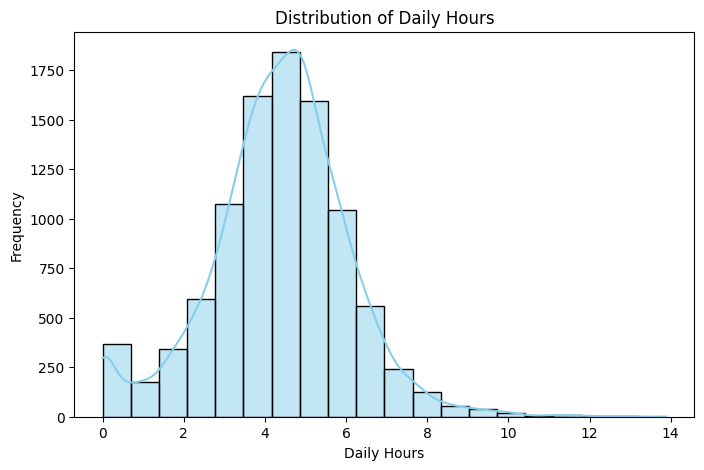

In [10]:
# 1. Distribution of Daily Hours (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Daily Hours')
plt.xlabel('Daily Hours')
plt.ylabel('Frequency')
plt.show()

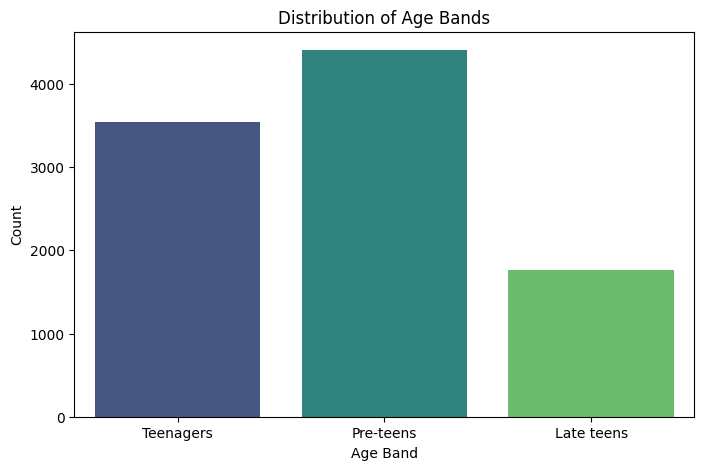

In [13]:
# 2. Distribution of Age Bands (Bar chart)
# 8 <= age <= 12: PREE TEENS
#  13 <= age <= 16: TEENAGERS
# 17 <= age <= 18: LATE TEENS

plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Band', data=df, palette='viridis')
plt.title('Distribution of Age Bands')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.show()

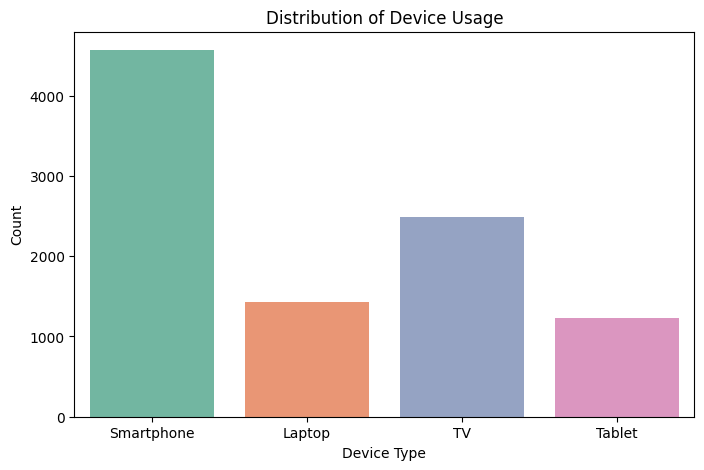

In [16]:
# 3. Device Usage (Bar chart)
plt.figure(figsize=(8, 5))
sns.countplot(x='Primary_Device', data=df, palette='Set2')
plt.title('Distribution of Device Usage')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

**Bivariate Analysis**

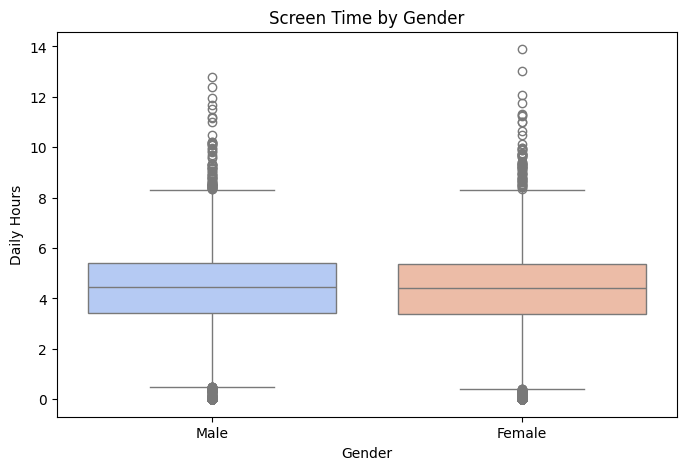

In [17]:
# 1. Compare Screen Time by Gender (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='coolwarm')
plt.title('Screen Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Daily Hours')
plt.show()

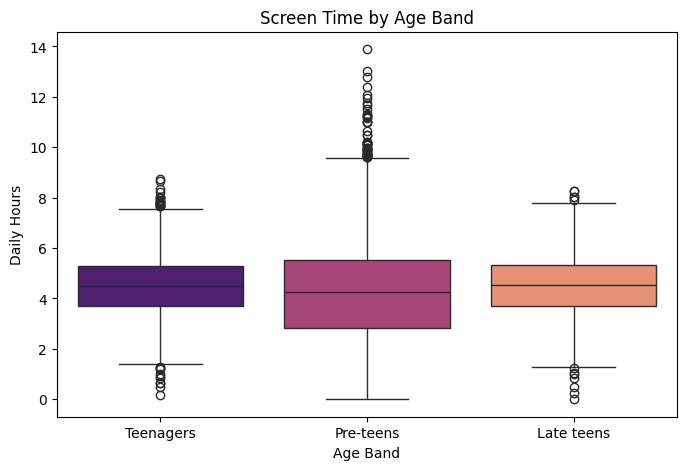

In [19]:
# 2. Compare Screen Time by Age Band (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=df, palette='magma')
plt.title('Screen Time by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Daily Hours')
plt.show()


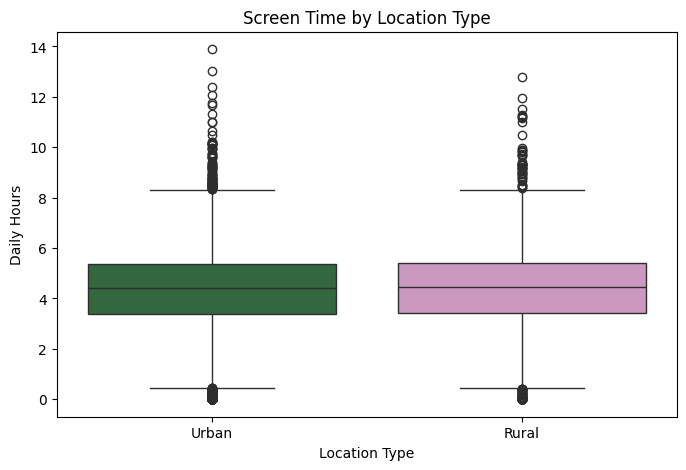

In [21]:
# 3. Compare Screen Time by Location Type (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df, palette='cubehelix')
plt.title('Screen Time by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Daily Hours')
plt.show()

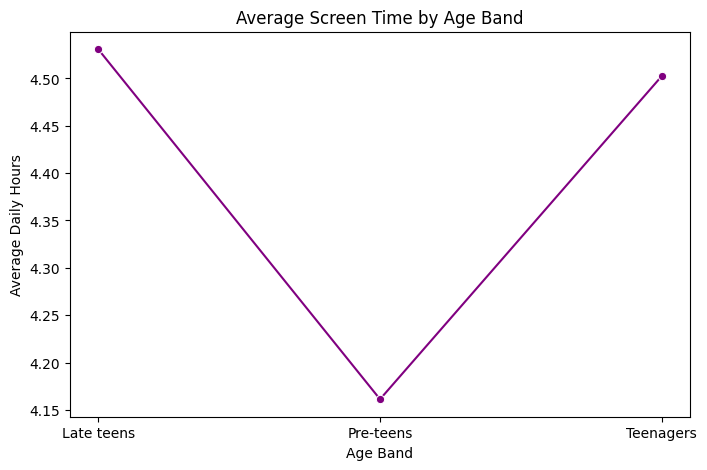

In [25]:
# 4. Average Screentime by Age Band (Line plot)
avg_hours = df.groupby('Age_Band')['Avg_Daily_Screen_Time_hr'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=avg_hours, marker='o', color='purple')
plt.title('Average Screen Time by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Average Daily Hours')
plt.show()

**Understandings**

# Understandings — Week 3: Univariate & Bivariate Visual Analysis

## 🔹 Univariate Analysis
- The dataset contains **9,712 records** of Indian kids' screen time habits.
- The **average daily screen time** is approximately **4.35 hours**, showing that most kids spend around **4–6 hours** per day on screens.
- The **distribution of screen time** shows that:
  - 47% of kids spend between **4–6 hours** daily.
  - 30% spend between **2–4 hours**.
  - Only 8% have low screen exposure (<2 hours).
- The **most commonly used devices** are:
  - **Smartphones** (~47%)
  - **TVs** (~26%)
  - Followed by **Laptops** and **Tablets**
- Among the participants:
  - **Pre-teens (8–12 years)** form the largest group (~45%).
  - **Teenagers (13–16 years)** make up around 36%.
  - **Late teens (17–18 years)** are about 18%.

---

## 🔹 Bivariate Analysis
- **Screen time by Gender:**  
  Both males and females have **similar screen usage**, averaging around **4.3–4.4 hours per day**.
  
- **Screen time by Age Band:**  
  - **Pre-teens:** ~4.16 hrs  
  - **Teenagers:** ~4.50 hrs  
  - **Late teens:** ~4.53 hrs  
  → This shows a **gradual increase in screen time with age**.

- **Screen time by Location (Urban/Rural):**  
  - **Rural:** 4.37 hrs  
  - **Urban:** 4.34 hrs  
  → Screen time is **almost equal** across rural and urban areas.

---

## 🔹 Overall Insights
- **Smartphones and TVs** are the dominant devices, indicating that children’s screen time is divided between **interactive (mobile)** and **passive (television)** activities.
- **Older kids (teenagers and late teens)** tend to have **higher screen exposure**, possibly due to academic and entertainment use.
- The **gender gap** in screen time is minimal, suggesting similar usage habits among boys and girls.
- The **urban–rural difference** is also small, showing that screen exposure is widespread across regions.
- Most kids **exceed the recommended screen time**, which may increase the risk of health issues like eye strain or poor sleep.

---

## 🔹 Conclusion
From this analysis, it is evident that:
- Screen usage among kids is **moderate to high**.
- **Age** has a stronger impact on screen time than **gender** or **location**.
- **Smartphones and TVs** dominate screen habits.
